In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(columns=['Serial No.'],inplace=True)

In [12]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [49]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 7)                 56        
                                                                 
 dense_11 (Dense)            (None, 7)                 56        
                                                                 
 dense_12 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [52]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 17ms/step - loss: 1.1010 - val_loss: 0.8829
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8764 - val_loss: 0.6966
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6855 - val_loss: 0.5440
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5223 - val_loss: 0.3995
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3674 - val_loss: 0.2679
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2281 - val_loss: 0.1567
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1226 - val_loss: 0.0772
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0567 - val_loss: 0.0374
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0312 - val_loss: 0.0276
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0267 - val_loss: 0.0258
Epoch 11

In [53]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 1ms/step


In [54]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.7410765292878259


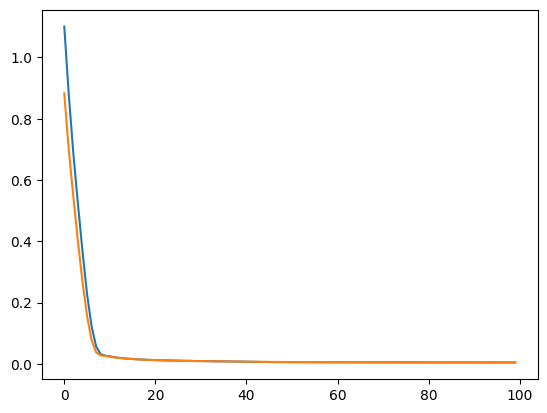

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])